In [17]:
import glob
import os
import tensorflow as tf
import shutil
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from shutil import copyfile
import soundfile as sf
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import librosa.display
import scipy.io.wavfile

In [18]:
#Loading Data
#Train_Directroy = '.\Train'
try:
    
    os.makedirs('/tmp/wav_files')
    #os.makedirs('/tmp/signals')
    os.makedirs('/tmp/wav_files/signals')
    os.makedirs('/tmp/wav_files/specs')
    os.makedirs('/tmp/noise/noise')
    os.makedirs('/tmp/noise/specs')
    os.makedirs('/tmp/noisy_signals')
    os.makedirs('/tmp/noisy_signals/signals')
    os.makedirs('/tmp/noisy_signals/specs')
    os.makedirs('/tmp/noisy_signals/masks')
    os.makedirs('/tmp/training/input')
    os.makedirs('/tmp/training/output')
    os.makedirs('/tmp/validation/input')
    os.makedirs('/tmp/validation/output')
    os.makedirs('/tmp/testing/input')
    os.makedirs('/tmp/testing/output')
    os.makedirs('/tmp/test_signal/noisy_signal')
    os.makedirs('/tmp/test_signal/spec')
    os.makedirs('/tmp/test_signal/predicted_signal')
    os.makedirs('/tmp/source')
    
except OSError:
    pass

SOURCE_DIR = "/tmp/source/"
TRAINING_DIR = "/tmp/training/"
TESTING_DIR = "/tmp/testing/"
WAV_FILES = "/tmp/wav_files/"


In [19]:
#Load the wav files
SOURCE = "/tmp/source/"   # source of raw data
DEST = "/tmp/wav_files/signals/"
def load_wav_data(SOURCE, DEST):
    list = (os.listdir(SOURCE))
    for i in range(len(list)):
        if(os.path.isdir(SOURCE+list[i])):
            if (os.path.getsize(SOURCE+list[i])>0):
                load_wav_data(SOURCE+list[i]+"/",DEST)     
        elif (list[i].endswith('.WAV')):
            #print(SOURCE+list[i])
            shutil.copy2(SOURCE+list[i],DEST)
            s, fs = sf.read(SOURCE+list[i])
load_wav_data(SOURCE, DEST)


In [20]:
SOURCE = "/tmp/wav_files/signals/"
def get_min_signal(SOURCE):
    minLenSignal = 100000;
    list = (os.listdir(SOURCE))
    for i in range(len(list)):    
        if (list[i].endswith('.WAV')):
            s, fs = sf.read(SOURCE+list[i])
            if(len(s)<minLenSignal):
                minLenSignal = len(s)
    return minLenSignal,fs
minLenSignal,fs = get_min_signal(SOURCE)

In [21]:
print(fs)

16000


In [ ]:
# resize signals to the size of the smallest one
def resize_signals(SOURCE,DEST):
    list = (os.listdir(SOURCE))
    for i in range(len(list)):    
        if (list[i].endswith('.WAV')):
            s, fs = sf.read(SOURCE+list[i])
            for j in range(int(len(s)/minLenSignal)):
                x = s[j*minLenSignal:(j+1)*minLenSignal]
                scipy.io.wavfile.write(DEST+'signal'+str(i+1)+'_'+str(j+1)+'.WAV',fs,x)
#resize_signals(SOURCE,DEST)   

In [21]:
# resample noise signal     
def noise_resample(SOURCE_NOISE,fs):
    b, fb = sf.read(SOURCE_NOISE)
    b = signal.resample(b,int(len(b)*fs/fb))
    return b


SA1.WAV
SA2.WAV
SI1005.WAV
SI1007.WAV
SI1008.WAV
SI1014.WAV
SI1021.WAV
SI1022.WAV
SI1035.WAV
SI1036.WAV
SI1041.WAV
SI1042.WAV
SI1044.WAV
SI1047.WAV
SI1048.WAV
SI1049.WAV
SI1051.WAV
SI1052.WAV
SI1055.WAV
SI1057.WAV
SI1058.WAV
SI1059.WAV
SI1060.WAV
SI1061.WAV
SI1063.WAV
SI1064.WAV
SI1065.WAV
SI1066.WAV
SI1068.WAV
SI1069.WAV
SI1071.WAV
SI1072.WAV
SI1073.WAV
SI1074.WAV
SI1075.WAV
SI1077.WAV
SI1078.WAV
SI1080.WAV
SI1098.WAV
SI1101.WAV
SI1107.WAV
SI1110.WAV
SI1115.WAV
SI1117.WAV
SI1118.WAV
SI1121.WAV
SI1131.WAV
SI1136.WAV
SI1137.WAV
SI1140.WAV
SI1141.WAV
SI1145.WAV
SI1147.WAV
SI1150.WAV
SI1153.WAV
SI1157.WAV
SI1159.WAV
SI1160.WAV
SI1164.WAV
SI1165.WAV
SI1168.WAV
SI1169.WAV
SI1170.WAV
SI1176.WAV
SI1186.WAV
SI1187.WAV
SI1191.WAV
SI1197.WAV
SI1209.WAV
SI1211.WAV
SI1212.WAV
SI1229.WAV
SI1233.WAV
SI1234.WAV
SI1236.WAV
SI1240.WAV
SI1241.WAV
SI1248.WAV
SI1251.WAV
SI1252.WAV
SI1253.WAV
SI1257.WAV
SI1258.WAV
SI1266.WAV
SI1267.WAV
SI1269.WAV
SI1274.WAV
SI1275.WAV
SI1284.WAV
SI1287.WAV
SI1290.WAV
SI129

SX312.WAV
SX315.WAV
SX316.WAV
SX32.WAV
SX321.WAV
SX322.WAV
SX324.WAV
SX325.WAV
SX326.WAV
SX327.WAV
SX328.WAV
SX329.WAV
SX33.WAV
SX330.WAV
SX331.WAV
SX332.WAV
SX333.WAV
SX334.WAV
SX335.WAV
SX336.WAV
SX337.WAV
SX338.WAV
SX339.WAV
SX340.WAV
SX341.WAV
SX342.WAV
SX343.WAV
SX344.WAV
SX345.WAV
SX346.WAV
SX347.WAV
SX348.WAV
SX349.WAV
SX35.WAV
SX350.WAV
SX351.WAV
SX352.WAV
SX353.WAV
SX354.WAV
SX355.WAV
SX356.WAV
SX357.WAV
SX358.WAV
SX359.WAV
SX360.WAV
SX361.WAV
SX362.WAV
SX363.WAV
SX366.WAV
SX367.WAV
SX37.WAV
SX375.WAV
SX376.WAV
SX377.WAV
SX378.WAV
SX38.WAV
SX381.WAV
SX382.WAV
SX384.WAV
SX386.WAV
SX387.WAV
SX39.WAV
SX390.WAV
SX391.WAV
SX392.WAV
SX393.WAV
SX395.WAV
SX397.WAV
SX398.WAV
SX399.WAV
SX40.WAV
SX400.WAV
SX401.WAV
SX402.WAV
SX405.WAV
SX406.WAV
SX41.WAV
SX411.WAV
SX412.WAV
SX414.WAV
SX415.WAV
SX416.WAV
SX417.WAV
SX418.WAV
SX419.WAV
SX42.WAV
SX420.WAV
SX421.WAV
SX422.WAV
SX423.WAV
SX424.WAV
SX425.WAV
SX426.WAV
SX427.WAV
SX428.WAV
SX429.WAV
SX430.WAV
SX431.WAV
SX432.WAV
SX433.WAV
SX434.WAV

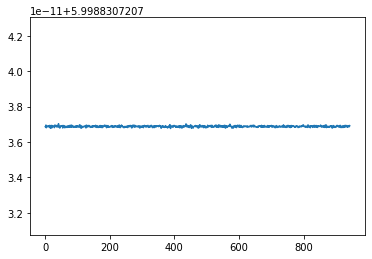

In [22]:
#adding noise to signals
import math
SOURCE_SIG = '/tmp/wav_files/signals/'
SOURCE_NOISE = '/tmp/Bruit/babble.WAV'
DEST_NOISY_SIGNAL = '/tmp/noisy_signals/signals/'
DEST_NOISE = '/tmp/noise/noise/'

def create_noisy_signal(SOURCE,SOURCE_NOISE,DEST_NOISY_SIGNAL,DEST_NOISE,fs):  
    br = noise_resample(SOURCE_NOISE,fs)
    list = (os.listdir(SOURCE))
    list_rsb = []
    for i in range(len(list)):
        print(list[i])
        if (list[i].endswith('.WAV')):
            s, fs = sf.read(SOURCE+list[i])
            num = random.randint(0,(len(br)-len(s))) 
            Ps=sum(s*s)
            Pbr=sum(br[num:(num+len(s))]*br[num:(num+len(s))])
            #alpha= math.sqrt(Ps/(Pbr)) #rsb=0
            #alpha= math.sqrt(Ps/(Pbr*0.25)) #rsb=-6db
            alpha= math.sqrt(Ps/(Pbr*3.98)) #rsb=+6db
            b=alpha*br[num:(num+len(s))]
            Pb=sum(b*b)
            Nsignal = s+b   #Noisy signal
            rsb=10*math.log10(Ps/(Pb))
            list_rsb.append(rsb)
            scipy.io.wavfile.write(DEST_NOISY_SIGNAL+list[i],fs,Nsignal)
            scipy.io.wavfile.write(DEST_NOISE+list[i],fs,b)
    return list_rsb

list_rsb=create_noisy_signal(SOURCE_SIG,SOURCE_NOISE,DEST_NOISY_SIGNAL,DEST_NOISE,fs)
#print(list_rsb)
plt.plot(list_rsb)

In [8]:
print(list_rsb)

[5.9988307207368665, 5.998830720736904, 5.998830720736938, 5.998830720736873, 5.9988307207368425, 5.998830720736854, 5.998830720736813, 5.99883072073691, 5.998830720736934, 5.998830720736877, 5.998830720736802, 5.998830720736887, 5.998830720736899, 5.998830720736969, 5.998830720736871, 5.998830720736882, 5.998830720736837, 5.998830720736783, 5.998830720736845, 5.998830720736939, 5.998830720736877, 5.998830720736914, 5.998830720736845, 5.998830720736823, 5.998830720736805, 5.9988307207368665, 5.998830720736872, 5.998830720736878, 5.998830720736882, 5.998830720736883, 5.998830720736828, 5.998830720736901, 5.998830720736902, 5.998830720736872, 5.998830720736929, 5.9988307207368585, 5.998830720736899, 5.998830720736939, 5.998830720736902, 5.998830720736912, 5.99883072073689, 5.998830720736914, 5.9988307207368585, 5.998830720736901, 5.99883072073694, 5.998830720736979, 5.998830720736872, 5.998830720736868, 5.998830720736854, 5.998830720736832, 5.998830720736893, 5.998830720736866, 5.9988307

In [24]:
# convert signal to spectrogram 
def signal_to_spec(SOURCE, DEST):
    list = (os.listdir(SOURCE))
    for i in range(len(list)):
        if (os.path.getsize(SOURCE+list[i])>0 & list[i].endswith('.WAV')):
            s, fs = sf.read(SOURCE+list[i])
            f_s, t_s, Zss = signal.stft(s, fs, nperseg=512, window='hann', noverlap=256)
            print(Zss.shape)
            #Sdb = librosa.amplitude_to_db(abs(Zss))
            #Sdb_normalized= (Sdb-np.min(Sdb))/(np.max(Sdb)-np.min(Sdb))
            #plt.pcolormesh(t_s, f_s,Sdb_normalized,  shading='auto')
            #librosa.display.specshow(Sdb, sr=fs, x_axis='time', y_axis='hz')
            #plt.title('STFT Magnitude of Sdb')
            #plt.ylabel('Frequency [Hz]')
            #plt.xlabel('Time [sec]')
            with open(DEST+'spec'+list[i][0:-4]+'.npy', 'wb') as f:
                np.save(f, np.array(Zss))
                
            

In [25]:
# create specs of noise
SOURCE = '/tmp/noise/noise/';
DEST = '/tmp/noise/specs/';            
signal_to_spec(SOURCE, DEST)

# create specs of signals
SOURCE = '/tmp/wav_files/signals/'
DEST = '/tmp/wav_files/specs/'
signal_to_spec(SOURCE, DEST)

# create specs of noisy signals
SOURCE = '/tmp/noisy_signals/signals/'
DEST = '/tmp/noisy_signals/specs/'
signal_to_spec(SOURCE, DEST)

(257, 202)
(257, 165)
(257, 241)
(257, 321)
(257, 172)
(257, 380)
(257, 147)
(257, 281)
(257, 227)
(257, 188)
(257, 197)
(257, 195)
(257, 144)
(257, 79)
(257, 178)
(257, 93)
(257, 299)
(257, 165)
(257, 248)
(257, 227)
(257, 356)
(257, 192)
(257, 201)
(257, 148)
(257, 133)
(257, 277)
(257, 291)
(257, 190)
(257, 233)
(257, 160)
(257, 180)
(257, 287)
(257, 137)
(257, 219)
(257, 378)
(257, 267)
(257, 287)
(257, 267)
(257, 73)
(257, 223)
(257, 241)
(257, 160)
(257, 392)
(257, 172)
(257, 310)
(257, 161)
(257, 208)
(257, 226)
(257, 277)
(257, 181)
(257, 257)
(257, 247)
(257, 311)
(257, 160)
(257, 162)
(257, 228)
(257, 147)
(257, 329)
(257, 249)
(257, 243)
(257, 293)
(257, 114)
(257, 145)
(257, 205)
(257, 369)
(257, 244)
(257, 117)
(257, 141)
(257, 303)
(257, 90)
(257, 284)
(257, 157)
(257, 91)
(257, 149)
(257, 176)
(257, 275)
(257, 123)
(257, 249)
(257, 309)
(257, 153)
(257, 147)
(257, 347)
(257, 298)
(257, 194)
(257, 247)
(257, 325)
(257, 210)
(257, 245)
(257, 301)
(257, 154)
(257, 340)
(257

(257, 133)
(257, 280)
(257, 275)
(257, 259)
(257, 262)
(257, 152)
(257, 180)
(257, 186)
(257, 312)
(257, 262)
(257, 196)
(257, 259)
(257, 332)
(257, 182)
(257, 234)
(257, 224)
(257, 245)
(257, 320)
(257, 154)
(257, 207)
(257, 282)
(257, 125)
(257, 275)
(257, 147)
(257, 168)
(257, 217)
(257, 186)
(257, 165)
(257, 179)
(257, 167)
(257, 160)
(257, 137)
(257, 229)
(257, 209)
(257, 207)
(257, 163)
(257, 124)
(257, 125)
(257, 161)
(257, 187)
(257, 137)
(257, 139)
(257, 153)
(257, 179)
(257, 227)
(257, 183)
(257, 208)
(257, 165)
(257, 187)
(257, 157)
(257, 183)
(257, 167)
(257, 215)
(257, 166)
(257, 143)
(257, 175)
(257, 159)
(257, 241)
(257, 209)
(257, 189)
(257, 210)
(257, 161)
(257, 160)
(257, 175)
(257, 149)
(257, 275)
(257, 269)
(257, 204)
(257, 175)
(257, 219)
(257, 236)
(257, 266)
(257, 198)
(257, 138)
(257, 210)
(257, 132)
(257, 247)
(257, 209)
(257, 256)
(257, 217)
(257, 241)
(257, 257)
(257, 224)
(257, 126)
(257, 260)
(257, 199)
(257, 188)
(257, 174)
(257, 299)
(257, 150)
(257, 147)

(257, 258)
(257, 264)
(257, 227)
(257, 123)
(257, 189)
(257, 205)
(257, 309)
(257, 171)
(257, 87)
(257, 189)
(257, 207)
(257, 263)
(257, 188)
(257, 95)
(257, 133)
(257, 145)
(257, 200)
(257, 234)
(257, 146)
(257, 194)
(257, 117)
(257, 259)
(257, 223)
(257, 122)
(257, 126)
(257, 112)
(257, 144)
(257, 298)
(257, 142)
(257, 265)
(257, 115)
(257, 157)
(257, 99)
(257, 301)
(257, 225)
(257, 216)
(257, 108)
(257, 105)
(257, 248)
(257, 146)
(257, 209)
(257, 176)
(257, 164)
(257, 90)
(257, 121)
(257, 281)
(257, 318)
(257, 157)
(257, 242)
(257, 273)
(257, 168)
(257, 203)
(257, 196)
(257, 114)
(257, 155)
(257, 387)
(257, 268)
(257, 177)
(257, 264)
(257, 101)
(257, 105)
(257, 198)
(257, 133)
(257, 235)
(257, 154)
(257, 173)
(257, 221)
(257, 147)
(257, 155)
(257, 170)
(257, 180)
(257, 280)
(257, 174)
(257, 132)
(257, 149)
(257, 174)
(257, 128)
(257, 87)
(257, 173)
(257, 250)
(257, 153)
(257, 134)
(257, 105)
(257, 159)
(257, 146)
(257, 146)
(257, 87)
(257, 164)
(257, 252)
(257, 152)
(257, 98)
(257, 

(257, 73)
(257, 223)
(257, 241)
(257, 160)
(257, 392)
(257, 172)
(257, 310)
(257, 161)
(257, 208)
(257, 226)
(257, 277)
(257, 181)
(257, 257)
(257, 247)
(257, 311)
(257, 160)
(257, 162)
(257, 228)
(257, 147)
(257, 329)
(257, 249)
(257, 243)
(257, 293)
(257, 114)
(257, 145)
(257, 205)
(257, 369)
(257, 244)
(257, 117)
(257, 141)
(257, 303)
(257, 90)
(257, 284)
(257, 157)
(257, 91)
(257, 149)
(257, 176)
(257, 275)
(257, 123)
(257, 249)
(257, 309)
(257, 153)
(257, 147)
(257, 347)
(257, 298)
(257, 194)
(257, 247)
(257, 325)
(257, 210)
(257, 245)
(257, 301)
(257, 154)
(257, 340)
(257, 241)
(257, 313)
(257, 180)
(257, 272)
(257, 215)
(257, 207)
(257, 203)
(257, 135)
(257, 257)
(257, 173)
(257, 125)
(257, 223)
(257, 149)
(257, 208)
(257, 180)
(257, 154)
(257, 277)
(257, 149)
(257, 267)
(257, 179)
(257, 256)
(257, 276)
(257, 172)
(257, 145)
(257, 313)
(257, 305)
(257, 182)
(257, 145)
(257, 328)
(257, 206)
(257, 259)
(257, 210)
(257, 297)
(257, 170)
(257, 306)
(257, 194)
(257, 246)
(257, 291)
(2

(257, 209)
(257, 207)
(257, 163)
(257, 124)
(257, 125)
(257, 161)
(257, 187)
(257, 137)
(257, 139)
(257, 153)
(257, 179)
(257, 227)
(257, 183)
(257, 208)
(257, 165)
(257, 187)
(257, 157)
(257, 183)
(257, 167)
(257, 215)
(257, 166)
(257, 143)
(257, 175)
(257, 159)
(257, 241)
(257, 209)
(257, 189)
(257, 210)
(257, 161)
(257, 160)
(257, 175)
(257, 149)
(257, 275)
(257, 269)
(257, 204)
(257, 175)
(257, 219)
(257, 236)
(257, 266)
(257, 198)
(257, 138)
(257, 210)
(257, 132)
(257, 247)
(257, 209)
(257, 256)
(257, 217)
(257, 241)
(257, 257)
(257, 224)
(257, 126)
(257, 260)
(257, 199)
(257, 188)
(257, 174)
(257, 299)
(257, 150)
(257, 147)
(257, 141)
(257, 149)
(257, 127)
(257, 114)
(257, 180)
(257, 168)
(257, 183)
(257, 109)
(257, 163)
(257, 195)
(257, 102)
(257, 129)
(257, 148)
(257, 167)
(257, 211)
(257, 156)
(257, 173)
(257, 117)
(257, 190)
(257, 232)
(257, 136)
(257, 211)
(257, 193)
(257, 159)
(257, 137)
(257, 181)
(257, 94)
(257, 210)
(257, 171)
(257, 187)
(257, 157)
(257, 97)
(257, 199)
(

In [26]:
SOURCE_SIGNAL_SPECS = '/tmp/wav_files/specs/'
SOURCE_NOISE_SPECS = '/tmp/noise/specs/'
DEST_MASK = '/tmp/noisy_signals/masks/'

def signal_to_mask(SOURCE_SIGNAL_SPECS,SOURCE_NOISE_SPECS, DEST_MASK):
    list_sig = (os.listdir(SOURCE_SIGNAL_SPECS))
    list_noise = (os.listdir(SOURCE_NOISE_SPECS))
    for i in range(len(list_sig)):
        with open(SOURCE_SIGNAL_SPECS+list_sig[i], 'rb') as f: 
            #SIG = librosa.amplitude_to_db(abs(np.load(f))) 
            SIG = abs(np.load(f))
        with open(SOURCE_NOISE_SPECS+list_noise[i], 'rb') as f:
            #NOISE = librosa.amplitude_to_db(abs(np.load(f)))
            NOISE = abs(np.load(f))
        RSB = (SIG**2)/(NOISE**2)     # parce que amplitude en dB
        where_are_NaNs = np.isnan(RSB)
        RSB[where_are_NaNs] = 1
        RSB[RSB>=0.9]=1
        RSB[RSB<0.9]=0
        Mask = RSB
        """
        print(Mask)
        with open('/tmp/noisy_signals/specs/'+'specSX416.npy', 'rb') as f:
            s = np.load(f)
        print(s.shape)
        t_new,s_new = signal.istft(s*Mask, fs, nperseg=1024, window='hann',nfft= 4096, noverlap=256);
        print(s_new.shape)
        scipy.io.wavfile.write('/tmp'+'/masked_signal.wav',fs,s_new)
        print("eee")
        """
        with open(DEST_MASK+'mask'+list_sig[i][4:-4]+'.npy', 'wb') as f:
            np.save(f, np.array(Mask))
signal_to_mask(SOURCE_SIGNAL_SPECS,SOURCE_NOISE_SPECS, DEST_MASK)

In [27]:
SOURCE_SPEC = '/tmp/noisy_signals/specs/'
SOURCE_MASK = '/tmp/noisy_signals/masks/'
TRAINING = '/tmp/training/'
TESTING = '/tmp/testing/'
VALIDATION = '/tmp/validation/'
#Split the training set and the test set.
def split_data(SOURCE_SPEC, SOURCE_MASK, TRAINING, TESTING, train_ratio,val_ratio):
    #list_sig = random.sample(os.listdir(SOURCE), len(os.listdir(SOURCE)))
    list_specs = os.listdir(SOURCE_SPEC)
    list_mask = os.listdir(SOURCE_MASK)
    #shuffle data
    ziped_lists = list(zip(list_specs, list_mask))
    random.shuffle(ziped_lists)
    list_specs, list_mask = zip(*ziped_lists)
    
    for i in range(len(list_specs)):
        print(os.path.getsize(SOURCE_MASK+list_mask[i]))
        if(os.path.getsize(SOURCE_SPEC+list_specs[i])>0 and os.path.getsize(SOURCE_MASK+list_mask[i])>0):
            if (i < int(train_ratio*len(list_specs))):
                shutil.copy2(SOURCE_SPEC+list_specs[i],TRAINING+'input/')
                shutil.copy2(SOURCE_MASK+list_mask[i],TRAINING+'output/')
            elif (i < int((train_ratio+val_ratio)*len(list_specs))):
                shutil.copy2(SOURCE_SPEC+list_specs[i],VALIDATION+'input/')
                shutil.copy2(SOURCE_MASK+list_mask[i],VALIDATION+'output/')
            else:
                shutil.copy2(SOURCE_SPEC+list_specs[i],TESTING+'input/')
                shutil.copy2(SOURCE_MASK+list_mask[i],TESTING+'output/')
                
train_ratio = 0.8
val_ratio = 0.1
split_data(SOURCE_SPEC, SOURCE_MASK, TRAINING, TESTING, train_ratio, val_ratio)

616928
503848
390768
353760
429832
610760
528520
253016
368152
462728
425720
240680
386656
361984
314696
349648
610760
341424
306472
612816
318808
530576
610760
341424
197504
514128
322920
569640
263296
273576
666272
579920
588144
302360
298248
516184
442168
331144
312640
653936
240680
331144
746456
586088
396936
378432
750568
302360
530576
277688
795800
349648
236568
306472
355816
339368
267408
433944
407216
298248
417496
361984
361984
462728
279744
199560
368152
343480
616928
516184
458616
427776
649824
263296
246848
218064
499736
339368
534688
417496
189280
487400
265352
353760
376376
532632
584032
285912
339368
464784
662160
368152
380488
394880
376376
374320
678608
361984
224232
1003456
341424
376376
499736
228344
366096
635432
514128
384600
335256
618984
292080
368152
322920
320864
310584
166664
314696
253016
403104
547024
216008
528520
351704
641600
592256
421608
489456
588144
581976
281800
351704
401048
528520
446280
141992
442168
575808
403104
372264
569640
499736
528520
35581

In [28]:
def overlapping_indexes(len_array,size,hop):
    #size = 4
    #overlap = 1
    A = list(range(len_array))
    # length = length of the array that we want to split
    # size = size of each resulting chunk
    # hop = number of non overlaping samples between two chunks
    indexes = list(zip(*[A[i:] for i in range(size)]))[::hop]
    return indexes

In [29]:
# Load training and reshape data
def load_reshape_data(SOURCE_DATA):
    
    list_data = os.listdir(SOURCE_DATA+'input/')
    list_labels = os.listdir(SOURCE_DATA+'output/')

    Data = []
    Labels = []
    
    chunk_size = 7
    hop = 1
    
    for i in range(len(list_data)):
        #print(list_data[i])
        with open(SOURCE_DATA+'input/'+list_data[i], 'rb') as f:
            Sdb = librosa.amplitude_to_db(abs(np.load(f)))
            Sdb_normalized= (Sdb-np.min(Sdb))/(np.max(Sdb)-np.min(Sdb))
            indexes = overlapping_indexes(Sdb_normalized.shape[1],chunk_size,hop)
            kmin = int(chunk_size/2)
            kmax = kmin+len(indexes)
            for k in range(kmax-kmin):
                Data.append(Sdb_normalized[:,indexes[k]])

        with open(SOURCE_DATA+'output/'+list_labels[i], 'rb') as f:
            mask = np.load(f)
            split_mask = np.split(mask[:,kmin:kmax],(kmax-kmin), axis=1)
            Labels = Labels+split_mask
            
    data_array = np.array(Data)
    labels_array = np.array(Labels)
    
    data_array = np.transpose(data_array, (0,2,1)) 

    data_array = np.expand_dims(data_array, axis = 3)  
            
    return data_array,labels_array


In [30]:
SOURCE_TRAIN = '/tmp/training/'
input_train_data,output_train_data = load_reshape_data(SOURCE_TRAIN)
print(input_train_data.shape,output_train_data.shape )
with open(SOURCE_TRAIN+'input_train1_data1.npy', 'wb') as f:
    np.save(f, np.array(input_train_data))
with open(SOURCE_TRAIN+'output_train1_data1.npy', 'wb') as f:
    np.save(f, np.array(output_train_data))

(169904, 7, 257, 1) (169904, 257, 1)


In [ ]:
#print(input_train_data[10,:,0:10])
#print(output_train_data[10,0:10,:])

In [31]:
SOURCE_TEST = '/tmp/testing/'
input_test_data,output_test_data = load_reshape_data(SOURCE_TEST) 
print(input_test_data.shape,output_test_data.shape )
with open(SOURCE_TEST+'input_test1_data1.npy', 'wb') as f:
    np.save(f, np.array(input_test_data))
with open(SOURCE_TEST+'output_test1_data1.npy', 'wb') as f:
    np.save(f, np.array(output_test_data))

(22023, 7, 257, 1) (22023, 257, 1)


In [32]:
SOURCE_VAL = '/tmp/validation/'
input_val_data,output_val_data = load_reshape_data(SOURCE_VAL) 
print(input_val_data.shape,output_val_data.shape )
with open(SOURCE_VAL+'input_val1_data1.npy', 'wb') as f:
    np.save(f, np.array(input_val_data))
with open(SOURCE_VAL+'output_val1_data1.npy', 'wb') as f:
    np.save(f, np.array(output_val_data))

(20693, 7, 257, 1) (20693, 257, 1)


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('binary_accuracy')>= 0.95):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16, (3,3),padding = 'same', activation='relu',input_shape=(7, 257, 1)),
    tf.keras.layers.Conv2D(32, (3,3), padding = 'same',activation='relu'),
    tf.keras.layers.MaxPooling2D(1,3),
    tf.keras.layers.Conv2D(64, (3,3), padding = 'same',activation='relu'), 
    #tf.keras.layers.Conv2D(32, (3,3), padding = 'same',activation='relu'), 
    tf.keras.layers.MaxPooling2D(1,3),
    #tf.keras.layers.MaxPooling2D(1,12),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1024, activation='relu'), 
    tf.keras.layers.Dense(257, activation='sigmoid'), 
    ])

# Compile Model. 
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
callbacks = myCallback()
# Train the Model
history = model.fit(input_train_data, output_train_data, epochs=30 , verbose = 1,callbacks=[callbacks],validation_data = (input_val_data,output_val_data))

#batch_size =10


In [ ]:
model.save('model')
#model = tf.keras.models.load_model('model')

In [ ]:
print(history.history.keys())

In [ ]:
# PLOT LOSS AND ACCURACY
%matplotlib inline
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['binary_accuracy']
val_acc=history.history['val_binary_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r')#, "Training Accuracy")
plt.plot(epochs, val_acc, 'b')#, "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.figure()


#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')#, "Training Loss")
plt.plot(epochs, val_loss, 'b')#, "Validation Loss")
plt.title('Training and validation loss')
plt.legend(['train', 'validation'], loc='upper right')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.figure()


In [ ]:
model.evaluate(input_test_data, output_test_data, verbose=1)

In [ ]:
model.summary()

In [ ]:
donnee = input_train_data[0,:,:,:]
donnee = np.expand_dims(donnee, axis = 0)
donnee.shape
Mask = model.predict(donnee)
print(Mask.shape)

In [ ]:
labels = output_train_data[0,:]
sum(sum(abs(Mask-labels)))

In [ ]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(labels, Mask)
m.result().numpy()

In [ ]:
# get the spectrogram of the test signal and reshape it
def get_input(SOURCE,chunk_size,hop):
    input_signal = os.listdir(SOURCE)
    Data=[]
    with open(SOURCE+input_signal[0], 'rb') as f:
        SComplex = np.load(f)                                # complex spectrogram
        Sdb = librosa.amplitude_to_db(abs(SComplex))
        Sdb_normalized= (Sdb-np.min(Sdb))/(np.max(Sdb)-np.min(Sdb))
        indexes = overlapping_indexes(Sdb_normalized.shape[1],chunk_size,hop)
        kmin = int(chunk_size/2)
        kmax = kmin+len(indexes)
        for k in range(kmax-kmin):
            #print(B[:,indexes[k]])
            #print(Sdb_normalized[:,indexes[k]].shape)
            Data.append(Sdb_normalized[:,indexes[k]])
        input_data = np.array(Data)
        SComplex = SComplex[:,kmin:kmax]
    input_data = np.transpose(input_data, (0,2,1)) 
    input_data = np.expand_dims(input_data, axis = 3)
    print(input_data.shape)
    print(SComplex.shape)
    return SComplex,input_data

In [ ]:
SOURCE = "/tmp/test_signal/noisy_signal/"
DEST_SPEC = "/tmp/test_signal/spec/"
DEST_SIGNAL = "/tmp/test_signal/predicted_signal"
chunk_size = 7
hop = 1
def denoise_signal(SOURCE,DEST_SPEC,DEST_SIGNAL,chunk_size,hop):
    # create the spectrogram of the test signal
    signal_to_spec(SOURCE, DEST_SPEC)
    spec, input_data = get_input(DEST_SPEC,chunk_size,hop)
    denoised_spec = np.zeros((spec.shape[0],spec.shape[1]),dtype=complex)
    for i in range(input_data.shape[0]):
        spec_chunk = np.expand_dims(input_data[i,:,:,:], axis = 0)
        denoised_chunk = model.predict(spec_chunk)
        #denoised_chunk = denoised_chunk.reshape((chunk_size,-1)).T
        denoised_chunk[denoised_chunk>=0.5] = 1
        denoised_chunk[denoised_chunk<0.5] = 0
        denoised_spec[:,i] = spec[:,i]*denoised_chunk #input_data[i,:,:,0].T
    print(denoised_spec.shape)
    print(input_data[i,:,:,0].T.shape)
    t_new,s_new=signal.istft(denoised_spec, fs, nperseg=512, window='hann',noverlap=256);
    scipy.io.wavfile.write(DEST_SIGNAL+'/signal.wav',fs,s_new)
    return s_new
x = denoise_signal(SOURCE,DEST_SPEC,DEST_SIGNAL,chunk_size,hop)
